In [ ]:
"""""Keras visualization Util
"""""

In [2]:
# Baseline MLP for MNIST dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
print num_pixels

784


In [3]:
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print num_classes

10


In [19]:
num_pixels

784

In [4]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
	model.add(Dense(num_classes, init='normal', activation='softmax'))
	model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
	model.add(Dense(num_classes, init='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [5]:
# build the model
model = baseline_model()


In [8]:
from keras.utils.visualize_util import plot
plot(model, to_file='Keras model.png')

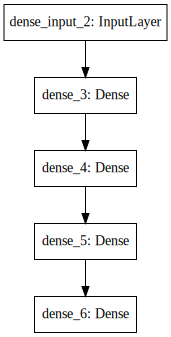

In [41]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))